## Project 1


### Import Dependencies

In [166]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
import datetime
import math
import random
import hvplot.pandas
import panel as pn
from yahoo_fin import stock_info as si
from yahoo_earnings_calendar import YahooEarningsCalendar
from MCForecastTools import MCSimulation

In [167]:
# Load .env enviroment variables
initial_investment = 10000

from dotenv import load_dotenv
load_dotenv()

True

In [168]:
### Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


In [230]:
#Ask User for intitial investment
investment_slider = pn.widgets.FloatSlider(name='Initial Investment', start=1000, end=100000, step=100, value=10000)

investment_slider

FloatSlider(end=100000, name='Initial Investment', start=1000, step=100, value=10000, value_throttled=10000)

### Dynamically Pull Stocks Based on Earnings Date

In [266]:
#Store initial investment
initial_investment = investment_slider.value
initial_investment

47300

In [232]:
#Ask the user for number of days to look at future earnings
day_slider = pn.widgets.FloatSlider(name='Please select the number of days to look at for earnings', start=1, end=25, step=1, value=2)

day_slider

FloatSlider(end=25, name='Please select t..., start=1, step=1, value=2, value_throttled=2)

In [233]:
#Store Selected days
furture_days = day_slider.value

In [234]:
today = datetime.date.today()
tomorrow = today + datetime.timedelta(days = 2) 
start_time = tomorrow.strftime("%b %d %Y") + " 10:00AM"
next_day = today + datetime.timedelta(days = 3) 
end_time = next_day.strftime("%b %d %Y") + " 1:00PM"

date_from = datetime.datetime.strptime(
    start_time, '%b %d %Y %I:%M%p')
date_to = datetime.datetime.strptime(
    end_time, '%b %d %Y %I:%M%p')
yec = YahooEarningsCalendar()
stock_earnings = yec.earnings_between(date_from, date_to)


In [235]:
stock_list = [{'ticker': ticker['ticker'], 'epsestimate': ticker['epsestimate']} for ticker in stock_earnings if ticker['epsestimate']]
tickers = []
for i in stock_list:
    if i["ticker"] not in tickers:
        tickers.append((i["ticker"]))
        
print(tickers)

['ABM', 'CNTG', 'LEN', 'TTC', 'REVG', 'MLHR', 'ACN', 'AIR', 'NAV', 'SCHL', 'CAMP', 'FDX', 'SAFM', 'GIS', 'OTLK', 'JBL', 'WOR']


In [236]:
tickers

['ABM',
 'CNTG',
 'LEN',
 'TTC',
 'REVG',
 'MLHR',
 'ACN',
 'AIR',
 'NAV',
 'SCHL',
 'CAMP',
 'FDX',
 'SAFM',
 'GIS',
 'OTLK',
 'JBL',
 'WOR']

In [237]:
# Set timeframe to '1D'
timeframe = "1D"

#Set timeframe for last 2 years
start_date = pd.Timestamp("2018-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp(next_day, tz="America/New_York").isoformat()

#Get ticker data
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

df_ticker.head()

ABM                                      ACN  \
                            open     high    low  close    volume    open   
time                                                                        
2018-05-01 00:00:00-04:00  31.04  31.0900  30.26  30.64  658848.0  151.09   
2018-05-02 00:00:00-04:00  30.63  30.6700  30.39  30.48  670396.0  151.72   
2018-05-03 00:00:00-04:00  30.46  30.6100  30.16  30.22  505683.0  150.30   
2018-05-04 00:00:00-04:00  30.16  30.4400  29.87  30.32  645674.0  150.71   
2018-05-07 00:00:00-04:00  30.37  30.4336  30.09  30.11  625649.0  152.95   

                                                               ...    TTC  \
                              high       low   close   volume  ...   open   
time                                                           ...          
2018-05-01 00:00:00-04:00  151.950  150.1200  151.88   821409  ...  58.34   
2018-05-02 00:00:00-04:00  152.090  150.4100  150.69   891638  ...  58.23   
2018-05-03 00:00:00-04:00  152.040  149.1400  151.68  1181445  ...  58.09   
2018-05-04 00:00:00-04:00  153.955  150.3500  153.44  1094740  ...  57.73   
2018-05-07 00:00:00-04:00  153.080  151.8408  152.32  1437543  ...  59.07   

                                                          WOR                \
                            high    low  close  volume   open   high    low   
time                                                                          
2018-05-01 00:00:00-04:00  58.60  56.83  58.22  443008  44.23  44.56  43.35   
2018-05-02 00:00:00-04:00  58.88  57.82  58.16  340310  44.59  44.82  43.97   
2018-05-03 00:00:00-04:00  58.62  57.24  58.18  323878  44.13  44.67  43.31   
2018-05-04 00:00:00-04:00  59.20  57.64  58.80  280470  43.53  44.69  43.24   
2018-05-07 00:00:00-04:00  59.93  59.07  59.32  485356  44.54  45.22  44.30   

                                            
                           close    volume  
time                                        
2018-05-01 00:00:00-04:00  44.37  214155.0  
2018-05-02 00:00:00-04:00  44.07  153262.0  
2018-05-03 00:00:00-04:00  43.75  179879.0  
2018-05-04 00:00:00-04:00  44.36  197542.0  
2018-05-07 00:00:00-04:00  45.19  187717.0  

[5 rows x 85 columns]

In [238]:
#Cleanup Pandas Data for Close Prices only
df_closing_prices = pd.DataFrame()

for ticker in tickers: 
    df_closing_prices[ticker] = df_ticker[ticker]["close"]

In [239]:
df_closing_prices.head()

ABM  CNTG    LEN    TTC   REVG   MLHR     ACN  \
time                                                                         
2018-05-01 00:00:00-04:00  30.64   NaN  53.91  58.22  18.15  31.35  151.88   
2018-05-02 00:00:00-04:00  30.48   NaN  53.25  58.16  17.66  31.75  150.69   
2018-05-03 00:00:00-04:00  30.22   NaN  53.62  58.18  17.40  31.90  151.68   
2018-05-04 00:00:00-04:00  30.32   NaN  54.44  58.80  17.69  32.20  153.44   
2018-05-07 00:00:00-04:00  30.11   NaN  54.30  59.32  18.43  31.90  152.32   

                             AIR    NAV   SCHL   CAMP      FDX    SAFM    GIS  \
time                                                                            
2018-05-01 00:00:00-04:00  43.47  34.89  41.11  19.72  244.750  113.41  43.54   
2018-05-02 00:00:00-04:00  43.41  34.96  41.27  19.96  240.615  114.27  42.48   
2018-05-03 00:00:00-04:00  43.52  34.82  41.65  19.75  242.180  112.48  41.21   
2018-05-04 00:00:00-04:00  44.39  35.67  41.66  19.76  244.920  112.55  42.54   
2018-05-07 00:00:00-04:00  45.33  36.71  42.19  20.75  243.110  111.06  42.33   

                           OTLK     JBL    WOR  
time                                            
2018-05-01 00:00:00-04:00   NaN  26.690  44.37  
2018-05-02 00:00:00-04:00   NaN  27.020  44.07  
2018-05-03 00:00:00-04:00   NaN  27.125  43.75  
2018-05-04 00:00:00-04:00   NaN  27.440  44.36  
2018-05-07 00:00:00-04:00   NaN  27.420  45.19

In [240]:
#Generate Closing Price Graph
df_closing_prices.index = df_closing_prices.index.date

daily_close = df_closing_prices.hvplot.line()
daily_close

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [241]:
#Generate Daily Returns Graph 
df_daily_returns = df_closing_prices.pct_change().dropna()

daily_returns = df_daily_returns.hvplot.line()
daily_returns

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [242]:
### Dynamically Generate Weights 

In [243]:
total = 1
weight_list = []
#portfolios = 5
#for num in range(len(portfolios)):
for i in range(len(tickers)):
    if i == (len(tickers)-1):
        weight_list.append(round(total,2))
    elif len(tickers) > 1 and len(tickers) <= 5:
        weight = (round(random.uniform(0,total),2))
        weight_list.append(round(weight,2))
        total -= weight
    elif len(tickers) > 5:
        weight = (round(random.uniform(0.1,total)/3,8))
        weight_list.append(round(weight,2))
        total -= weight        
    else:
        weight_list.append(1.0)
print(weight_list)

[0.13, 0.07, 0.09, 0.07, 0.06, 0.11, 0.04, 0.14, 0.08, 0.06, 0.04, 0.04, 0.03, 0.02, 0.02, 0.01, -0.0]


### The MCForecastTools Library at a Glance

### Simulate five year portfolio growth using Monte Carlo simulation

In [244]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = weight_list,
    num_simulation = 500,
    num_trading_days = 252*5
)

In [245]:
# Printing the simulation input data
MC_fiveyear.portfolio_data.head()

ABM                                   \
                            open     high    low  close    volume   
time                                                                
2018-05-01 00:00:00-04:00  31.04  31.0900  30.26  30.64  658848.0   
2018-05-02 00:00:00-04:00  30.63  30.6700  30.39  30.48  670396.0   
2018-05-03 00:00:00-04:00  30.46  30.6100  30.16  30.22  505683.0   
2018-05-04 00:00:00-04:00  30.16  30.4400  29.87  30.32  645674.0   
2018-05-07 00:00:00-04:00  30.37  30.4336  30.09  30.11  625649.0   

                                           ACN                             \
                          daily_return    open     high       low   close   
time                                                                        
2018-05-01 00:00:00-04:00          NaN  151.09  151.950  150.1200  151.88   
2018-05-02 00:00:00-04:00    -0.005222  151.72  152.090  150.4100  150.69   
2018-05-03 00:00:00-04:00    -0.008530  150.30  152.040  149.1400  151.68   
2018-05-04 00:00:00-04:00     0.003309  150.71  153.955  150.3500  153.44   
2018-05-07 00:00:00-04:00    -0.006926  152.95  153.080  151.8408  152.32   

                           ...    TTC                                WOR  \
                           ...    low  close  volume daily_return   open   
time                       ...                                             
2018-05-01 00:00:00-04:00  ...  56.83  58.22  443008          NaN  44.23   
2018-05-02 00:00:00-04:00  ...  57.82  58.16  340310    -0.001031  44.59   
2018-05-03 00:00:00-04:00  ...  57.24  58.18  323878     0.000344  44.13   
2018-05-04 00:00:00-04:00  ...  57.64  58.80  280470     0.010657  43.53   
2018-05-07 00:00:00-04:00  ...  59.07  59.32  485356     0.008844  44.54   

                                                                       
                            high    low  close    volume daily_return  
time                                                                   
2018-05-01 00:00:00-04:00  44.56  43.35  44.37  214155.0          NaN  
2018-05-02 00:00:00-04:00  44.82  43.97  44.07  153262.0    -0.006761  
2018-05-03 00:00:00-04:00  44.67  43.31  43.75  179879.0    -0.007261  
2018-05-04 00:00:00-04:00  44.69  43.24  44.36  197542.0     0.013943  
2018-05-07 00:00:00-04:00  45.22  44.30  45.19  187717.0     0.018711  

[5 rows x 102 columns]

In [246]:
# Running a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.999811  1.026388  1.023217  0.984035  1.000271  0.982937  1.005627   
2     1.019889  1.011164  1.019966  0.992333  1.011417  0.997229  0.983328   
3     1.023837  1.023410  1.015918  0.984965  1.008651  1.020482  0.966968   
4     1.022092  1.029523  1.040776  0.987244  1.029952  1.002846  0.970726   
...        ...       ...       ...       ...       ...       ...       ...   
1256  4.417638  5.870131  6.758399  2.487240  4.457255  2.296666  4.723554   
1257  4.441824  5.873751  6.985004  2.495588  4.416202  2.199054  4.690115   
1258  4.454409  5.907462  7.028220  2.458042  4.444145  2.226965  4.711046   
1259  4.406841  5.728512  7.204612  2.479424  4.411757  2.322180  4.689672   
1260  4.388298  5.723173  7.237797  2.469822  4.333626  2.303013  4.728896   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.991893  0.993172  0.989772  ...  1.035968  1.001407  0.998518   
2     0.985568  0.977224  0.969896  ...  1.029188  1.001957  0.992860   
3     0.965911  1.010958  0.948700  ...  1.002589  1.023461  0.986786   
4     0.969689  1.027708  0.946590  ...  1.008690  1.004046  0.989910   
...        ...       ...       ...  ...       ...       ...       ...   
1256  2.784995  5.134173  6.336172  ...  8.496647  9.917582  8.034260   
1257  2.699538  5.063229  6.328945  ...  8.694110  9.800077  7.856373   
1258  2.726709  5.232528  6.259977  ...  8.618987  9.539841  7.720659   
1259  2.741292  5.143408  6.268008  ...  8.563261  9.653488  7.532080   
1260  2.683534  5.168656  6.435600  ...  8.582470  9.494959  7.537085   

           493        494       495       496       497       498       499  
0     1.000000   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.979321   1.021258  0.987030  1.006896  0.983245  0.989594  1.001472  
2     0.971688   1.021537  0.994062  0.994819  1.017164  0.964896  0.970809  
3     1.004374   1.032597  0.979965  0.993860  0.996176  0.972893  0.985863  
4     1.010070   1.024573  0.988497  1.021331  0.974559  0.967309  0.985184  
...        ...        ...       ...       ...       ...       ...       ...  
1256  1.705044   9.983773  4.501878  4.536071  7.816828  1.240146  5.591468  
1257  1.707538  10.074027  4.445726  4.552095  7.653862  1.252191  5.585214  
1258  1.692952  10.113360  4.558619  4.483531  7.705027  1.274048  5.568269  
1259  1.727633  10.110755  4.520083  4.473911  7.877031  1.268199  5.631057  
1260  1.739591  10.078633  4.498174  4.469199  7.739560  1.253920  5.752236  

[1261 rows x 500 columns]

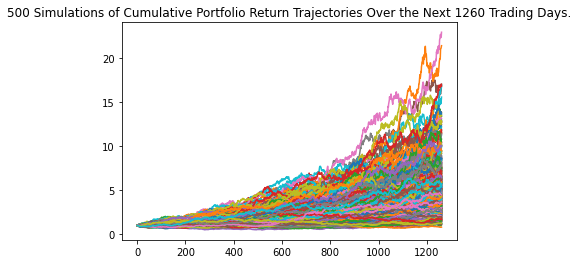

In [247]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

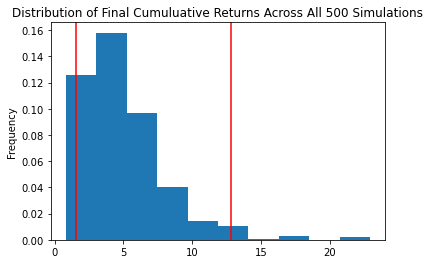

In [248]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [249]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
tbl

count           500.000000
mean              5.049008
std               2.977680
min               0.817332
25%               2.924281
50%               4.385768
75%               6.304823
max              22.950705
95% CI Lower      1.546498
95% CI Upper     12.825421
Name: 1260, dtype: float64

In [250]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $47300 in the portfolio over the next 5 years will end within in the range of $73149.37 and $606642.41


In [251]:
portfolio = {}
for ticker in tickers:
    stock_weight = weight_list[tickers.index(ticker)] * initial_investment
    current_stock_price = round(si.get_live_price(ticker),2)
    portfolio_weight = stock_weight//current_stock_price
    portfolio[ticker] = math.floor(portfolio_weight)

for key in portfolio.keys():
    mystring = f"Buy {key}: {portfolio[key]} shares"
    print(mystring)

Buy ABM: 154 shares
Buy CNTG: 280 shares
Buy LEN: 57 shares
Buy TTC: 36 shares
Buy REVG: 299 shares
Buy MLHR: 137 shares
Buy ACN: 7 shares
Buy AIR: 196 shares
Buy NAV: 85 shares
Buy SCHL: 107 shares
Buy CAMP: 178 shares
Buy FDX: 6 shares
Buy SAFM: 10 shares
Buy GIS: 15 shares
Buy OTLK: 716 shares
Buy JBL: 11 shares
Buy WOR: 0 shares


In [252]:
df_shares = pd.DataFrame(list(portfolio.items()),columns = ['ticker','shares'])
df_shares.set_index(['ticker'], inplace=True)
df_shares

shares
ticker        
ABM        154
CNTG       280
LEN         57
TTC         36
REVG       299
MLHR       137
ACN          7
AIR        196
NAV         85
SCHL       107
CAMP       178
FDX          6
SAFM        10
GIS         15
OTLK       716
JBL         11
WOR          0

In [253]:
#plot = df_shares.plot.pie(subplots=True,figsize=(5, 5))

2020-12-14 22:22:28,336 param.panel_extension WARNING  A HoloViz extension was loaded previously. This means the extension is already initialized and the following Panel extensions could not be properly loaded: ['plotly']. If you are loading custom extensions with pn.extension(...) ensure that this is called before any other HoloViz extension such as hvPlot or HoloViews.


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
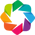

In [254]:
# imports
import panel as pn
import numpy as np
pn.extension('plotly')
import holoviews as hv
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
pn.extension()
import holoviews as hv
import holoviews.plotting.bokeh
hv.extension('bokeh')


In [255]:
closing_line= df_closing_prices.hvplot.line()
closing_line

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [256]:
return_line= df_daily_returns.hvplot.line()
return_line


:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [257]:
df_closing_prices.head()

ABM  CNTG    LEN    TTC   REVG   MLHR     ACN    AIR    NAV  \
2018-05-01  30.64   NaN  53.91  58.22  18.15  31.35  151.88  43.47  34.89   
2018-05-02  30.48   NaN  53.25  58.16  17.66  31.75  150.69  43.41  34.96   
2018-05-03  30.22   NaN  53.62  58.18  17.40  31.90  151.68  43.52  34.82   
2018-05-04  30.32   NaN  54.44  58.80  17.69  32.20  153.44  44.39  35.67   
2018-05-07  30.11   NaN  54.30  59.32  18.43  31.90  152.32  45.33  36.71   

             SCHL   CAMP      FDX    SAFM    GIS  OTLK     JBL    WOR  
2018-05-01  41.11  19.72  244.750  113.41  43.54   NaN  26.690  44.37  
2018-05-02  41.27  19.96  240.615  114.27  42.48   NaN  27.020  44.07  
2018-05-03  41.65  19.75  242.180  112.48  41.21   NaN  27.125  43.75  
2018-05-04  41.66  19.76  244.920  112.55  42.54   NaN  27.440  44.36  
2018-05-07  42.19  20.75  243.110  111.06  42.33   NaN  27.420  45.19

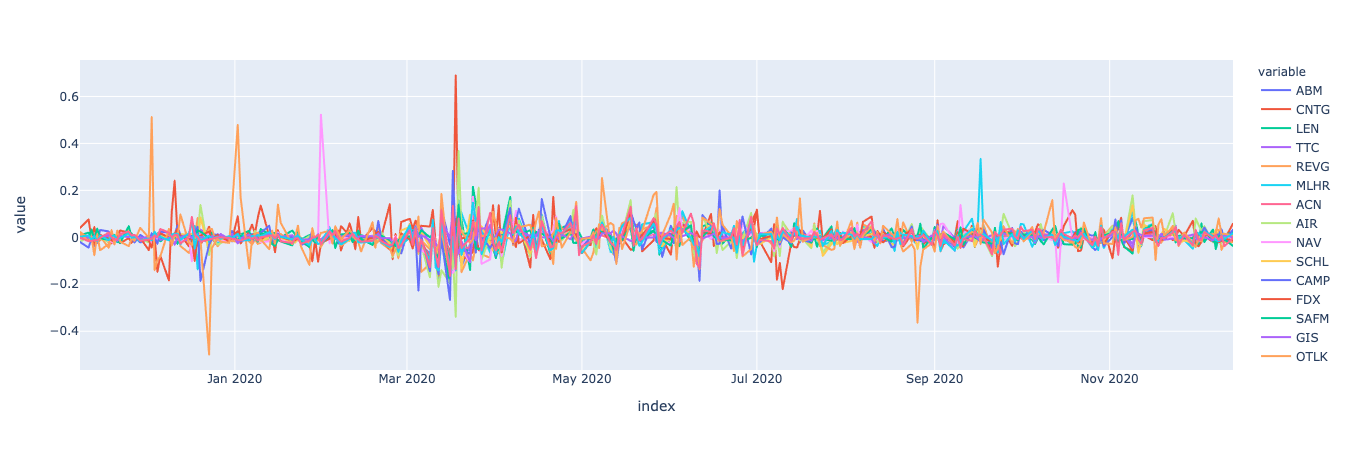

In [258]:
return_line_graph = px.line(df_daily_returns)
return_line_graph.show()

In [259]:
sharpe_ratios = (df_daily_returns.mean() * 252) / (df_daily_returns.std() * np.sqrt(252))
Sharpe_ratio_plot=sharpe_ratios.hvplot.bar(title= "Sharpe Ratios")
Sharpe_ratio_plot

:Bars   [index]   (0)

In [260]:
plot = df_shares.hvplot.bar(size=10)
plot

:Bars   [ticker]   (shares)

In [261]:
tbl = MC_fiveyear.summarize_cumulative_return()
tbl

count           500.000000
mean              5.049008
std               2.977680
min               0.817332
25%               2.924281
50%               4.385768
75%               6.304823
max              22.950705
95% CI Lower      1.546498
95% CI Upper     12.825421
Name: 1260, dtype: float64

In [267]:
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)
text = pn.pane.Markdown(f" **Summary** : There is a **95%** chance that an initial investment of **${initial_investment}** in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" **${ci_lower}** and **${ci_upper}**")

text2 = pn.pane.Markdown(f" **Portfolio Forecasting** : Let's determine your returns based on an initial investment of your choosing.")

In [268]:
investment_slider1 = pn.widgets.FloatSlider(name='Initial Investment', start=1000, end=100000, step=100, value=10000)
day_slider = pn.widgets.FloatSlider(name='Please select the number of days to look at for earnings', start=1, end=25, step=1, value=2)

tabs = pn.Tabs(('Daily Returns ',return_line_graph),
               ('Sharpe Ratios',Sharpe_ratio_plot), 
              ('Closing Price',closing_line),

              ('Share', plot),)

Dashboard = pn.Row(pn.Column('### Portfolio Analysis',text,investment_slider1,day_slider,width=400), tabs ,width=900)


Dashboard.servable()

Row(width=900)
    [0] Column(width=400)
        [0] Markdown(str)
        [1] Markdown(str)
        [2] FloatSlider(end=100000, name='Initial Investment', start=1000, step=100, value=10000, value_throttled=10000)
        [3] FloatSlider(end=25, name='Please select t..., start=1, step=1, value=2, value_throttled=2)
    [1] Tabs
        [0] Plotly(Figure, name='Daily Returns ')
        [1] HoloViews(Bars, name='Sharpe Ratios')
        [2] HoloViews(NdOverlay, name='Closing Price')
        [3] HoloViews(Bars, name='Share')

In [229]:
pn.serve(Dashboard)

Launching server at http://localhost:50894
